<a href="https://colab.research.google.com/github/Roxanne1225/C-Projects/blob/master/Copy_of_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [242]:
%matplotlib inline
# latest!!!
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [243]:
print('Not implemented.')

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
# theta_pred =  # TODO: Implement the analytical solution
theta_pred = la.lstsq(A, y_data, rcond = None)[0]
print('Empirical theta', theta_pred.reshape(-1))

Not implemented.
Empirical theta [0.99833251 0.99653268 1.00739729 0.99677629 0.99297486 0.99987283
 0.99744514 0.99185846 0.99452631 1.00622345]


# SGD Variants Noisy Function

In [244]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [245]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
        # print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''
        grad = np.sign(err) * deg_ * np.abs(err) ** (deg_ - 1) * x_ # TODO: Implement the analytical gradient
        l = np.abs(err) ** deg_ # TODO: Implement the loss function
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

# Running SGD Variants

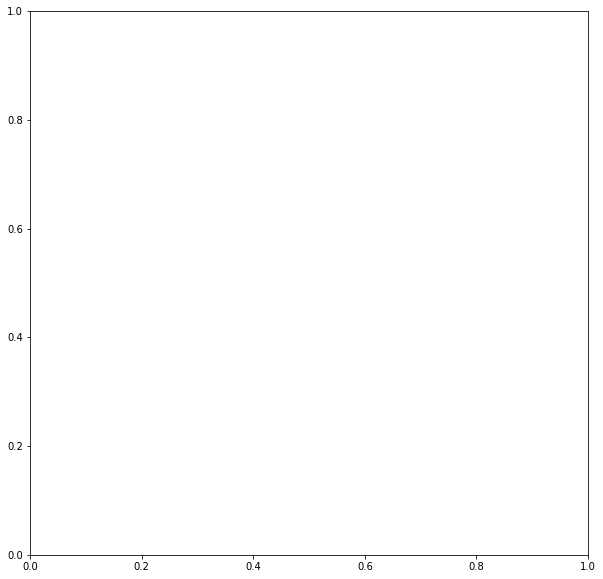

In [246]:
#@title Parameters
#  γ = 0.4, 0.7, 1, 2, 3, and 5
deg_ = 5 #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

adam 0
0
[[0.23696769]
 [0.24940505]
 [0.24021185]
 [0.18181381]
 [0.22168391]
 [0.22427063]
 [0.19623292]
 [0.19534109]
 [0.27047932]
 [0.24943815]]
1
[[0.19302668]
 [0.23443043]
 [0.24009377]
 [0.20175039]
 [0.2892942 ]
 [0.22192402]
 [0.21185375]
 [0.19538409]
 [0.24912945]
 [0.23833538]]
2
[[0.22797019]
 [0.22541447]
 [0.23347839]
 [0.25064379]
 [0.24907616]
 [0.23036706]
 [0.16637236]
 [0.19082371]
 [0.23915188]
 [0.24641084]]
3
[[0.19603897]
 [0.21976181]
 [0.23169638]
 [0.22091381]
 [0.27203799]
 [0.19360145]
 [0.22081201]
 [0.18664941]
 [0.2401927 ]
 [0.21044815]]
4
[[0.20345964]
 [0.23034216]
 [0.24252145]
 [0.21272431]
 [0.24877848]
 [0.2437874 ]
 [0.16837019]
 [0.16779425]
 [0.25836572]
 [0.22578052]]
5
[[0.19887193]
 [0.21851485]
 [0.25831622]
 [0.28328019]
 [0.26608878]
 [0.21634655]
 [0.23810401]
 [0.18104966]
 [0.27336504]
 [0.2072056 ]]
6
[[0.24016969]
 [0.25173878]
 [0.25285985]
 [0.20747862]
 [0.27574492]
 [0.24255537]
 [0.19367974]
 [0.1880675 ]
 [0.24534728]
 [0.243

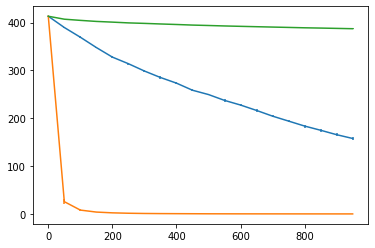

In [247]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
            # print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            # m = NotImplemented # TODO: Initialize parameters
            # v = NotImplemented
            m = np.zeros_like(theta_init)
            v = np.zeros_like(theta_init)
            episilon = 1e-8


        if method == 'adagrad':
            # print('Adagrad Not implemented.')
            episilon = 1e-8
            grad_square_sum = 0
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
                # print('Adam Not implemented.') # TODO: Implement Adam

                # m = NotImplemented
                # v = NotImplemented
                # m_hat = NotImplemented
                # v_hat = NotImplemented
                # theta_hat = theta_hat - lr * NotImplemented
                g_t = gradient
                    
                m = beta_1 * m + (1 - beta_1) * g_t
                v = beta_2 * v + (1 - beta_2) * (g_t ** 2)
                
                m_hat = m / (1 - (beta_1 ** (t + 1)))
                v_hat = v / (1 - (beta_2 ** (t + 1)))
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + episilon)
                
            
            elif method == 'adagrad':
                # print('Adagrad Not implemented.')
                # squared_sum = squared_sum + NotImplemented # TODO: Implement Adagrad
                # theta_hat = theta_hat - lr * NotImplemented
                g_t = gradient
                grad_square_sum += g_t * g_t
                theta_hat = theta_hat - (lr * g_t) / np.sqrt(grad_square_sum + episilon)
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        print(replicate)
        print(theta_hat)
        
    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    
    # print('Not implemented.')
    # '''
    # Hints:
    # 1. Use test_loss_np in np.mean() with axis = 0
    # '''
    # test_loss_mean = NotImplemented # TODO: Calculate the mean test loss
    test_loss_mean = np.mean(test_loss_np, axis=0)

    # '''
    # Hints:
    # 1. Use test_loss_np in np.std() with axis = 0 
    # 2. Divide by np.sqrt() using num_rep as a parameter
    # '''
    # test_loss_se = NotImplemented # TODO: Calculate the standard error for test loss
    test_loss_se = np.std(test_loss_np, axis=0)/(np.sqrt(num_rep))
    test_loss_mean = np.sum(test_loss_np, axis=0).reshape(-1) / np.sqrt(num_rep)

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)
    print(best_vals)

No handles with labels found to put in legend.


Text(0.5, 0, 'Updates')

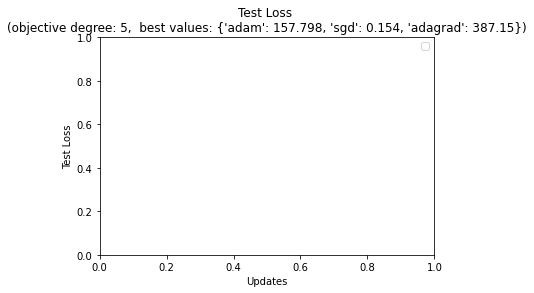

In [248]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')